In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from scipy.sparse import diags

## GKP code space
First, explore the Hamiltonian of the form 
$$
H = -(\cos(2\sqrt{\pi}X) + \cos(2\sqrt{\pi}P)
$$
where $[X,P]=i$. Note that in this form, $X$ and $P$ are equivalent to the superconducting phase $\varphi$ and normalized charge $n$ in a superconducting circuit
### X basis

In [345]:
Nx = 1200
xpts = np.linspace(-6,6,Nx+1)*np.sqrt(np.pi)
x=np.diag(xpts)
op_x = Qobj(2*np.sqrt(np.pi)*x)
op_cosx = Qobj(np.diag(np.cos(xpts)))
dx = xpts[-1]-xpts[-2]
dx_coeff = -1.0j/(2.0*dx)
p = dx_coeff*(np.diag(np.ones(Nx), 1) - np.diag(np.ones(Nx), -1))
cosp=diags([np.cos(dx_coeff),np.cos(dx_coeff)], [-1,1], shape=(Nx+1,Nx+1), format='csr', dtype='complex128')
op_p = Qobj(2*np.sqrt(np.pi)*p)
# op_cosp = Qobj(np.cos(p))
op_cosp = Qobj(cosp)
def LLL_hamiltonian(w,Vx,Vp):
    return w*(op_x**2 + op_p**2)/2 -Vx*op_x.cosm() - Vp*op_p.cosm()
#     return -Vx*op_cosx - Vp*op_cosp

# print (op_x)
# print (op_p)
# print (commutator(op_cosx, op_cosp, kind = 'normal'))

In [379]:
w = 0.01
Vx = 1
Vp = 1
energies, states = LLL_hamiltonian(w,Vx,Vp).eigenstates()

Text(0.5, 0, '$X/\\sqrt{\\pi}$')

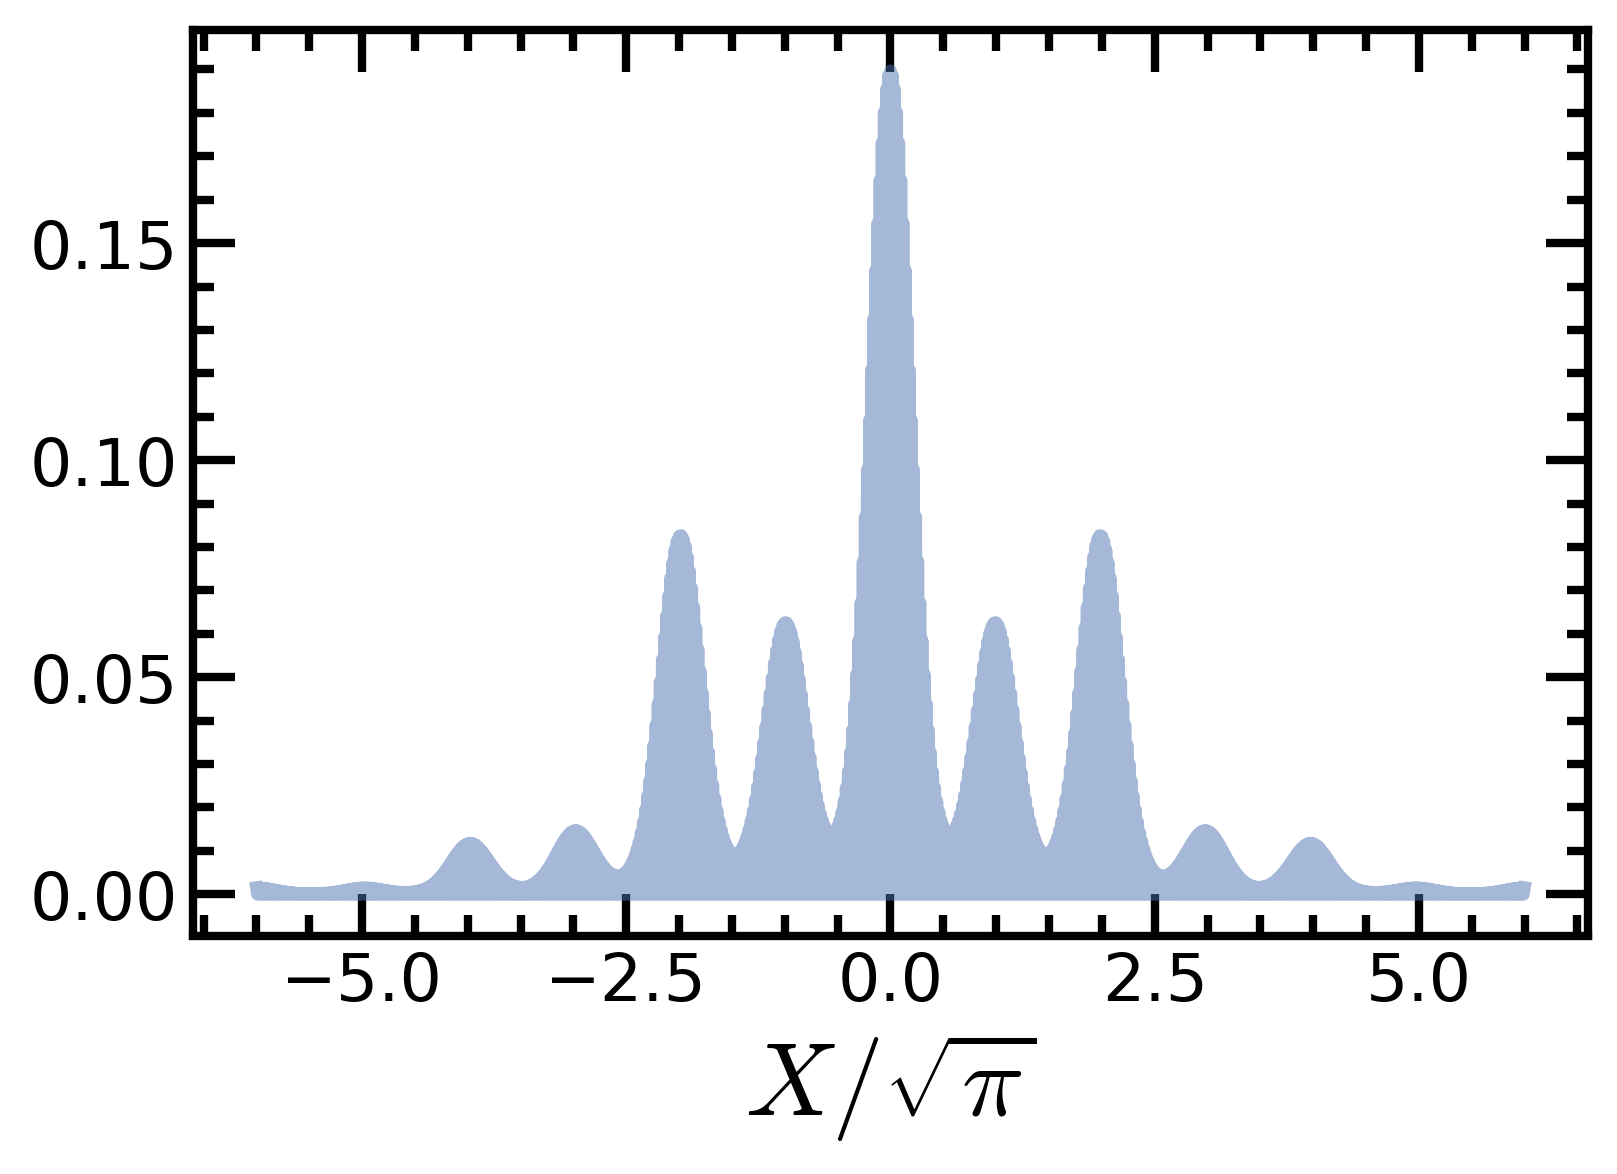

In [380]:
plt.plot(xpts/np.sqrt(np.pi), np.real(states[0]), alpha = 0.5)
plt.xlabel(r'$X/\sqrt{\pi}$')

Text(0.5, 0, '$X/\\sqrt{\\pi}$')

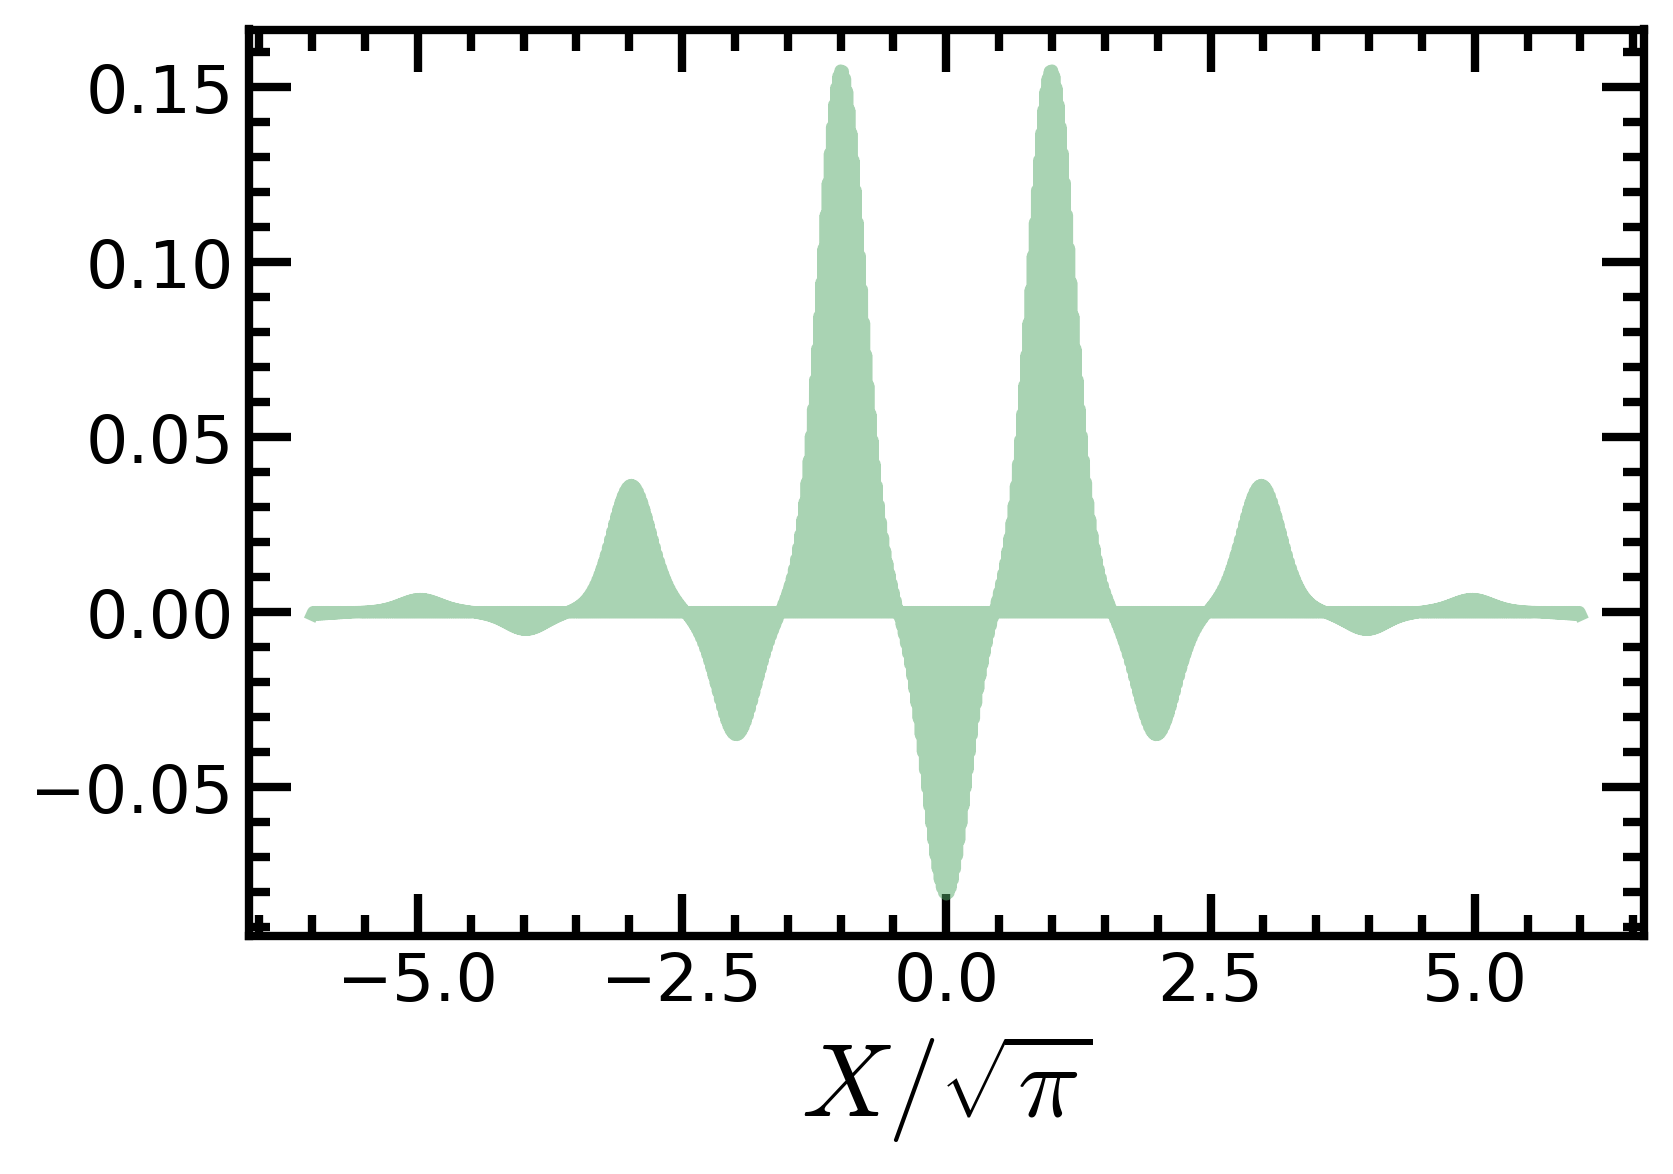

In [381]:
plt.plot(xpts/np.sqrt(np.pi), np.real(states[2]), color = 'C1', alpha = 0.5)
plt.xlabel(r'$X/\sqrt{\pi}$')

Text(0.5, 0, '$X/\\sqrt{\\pi}$')

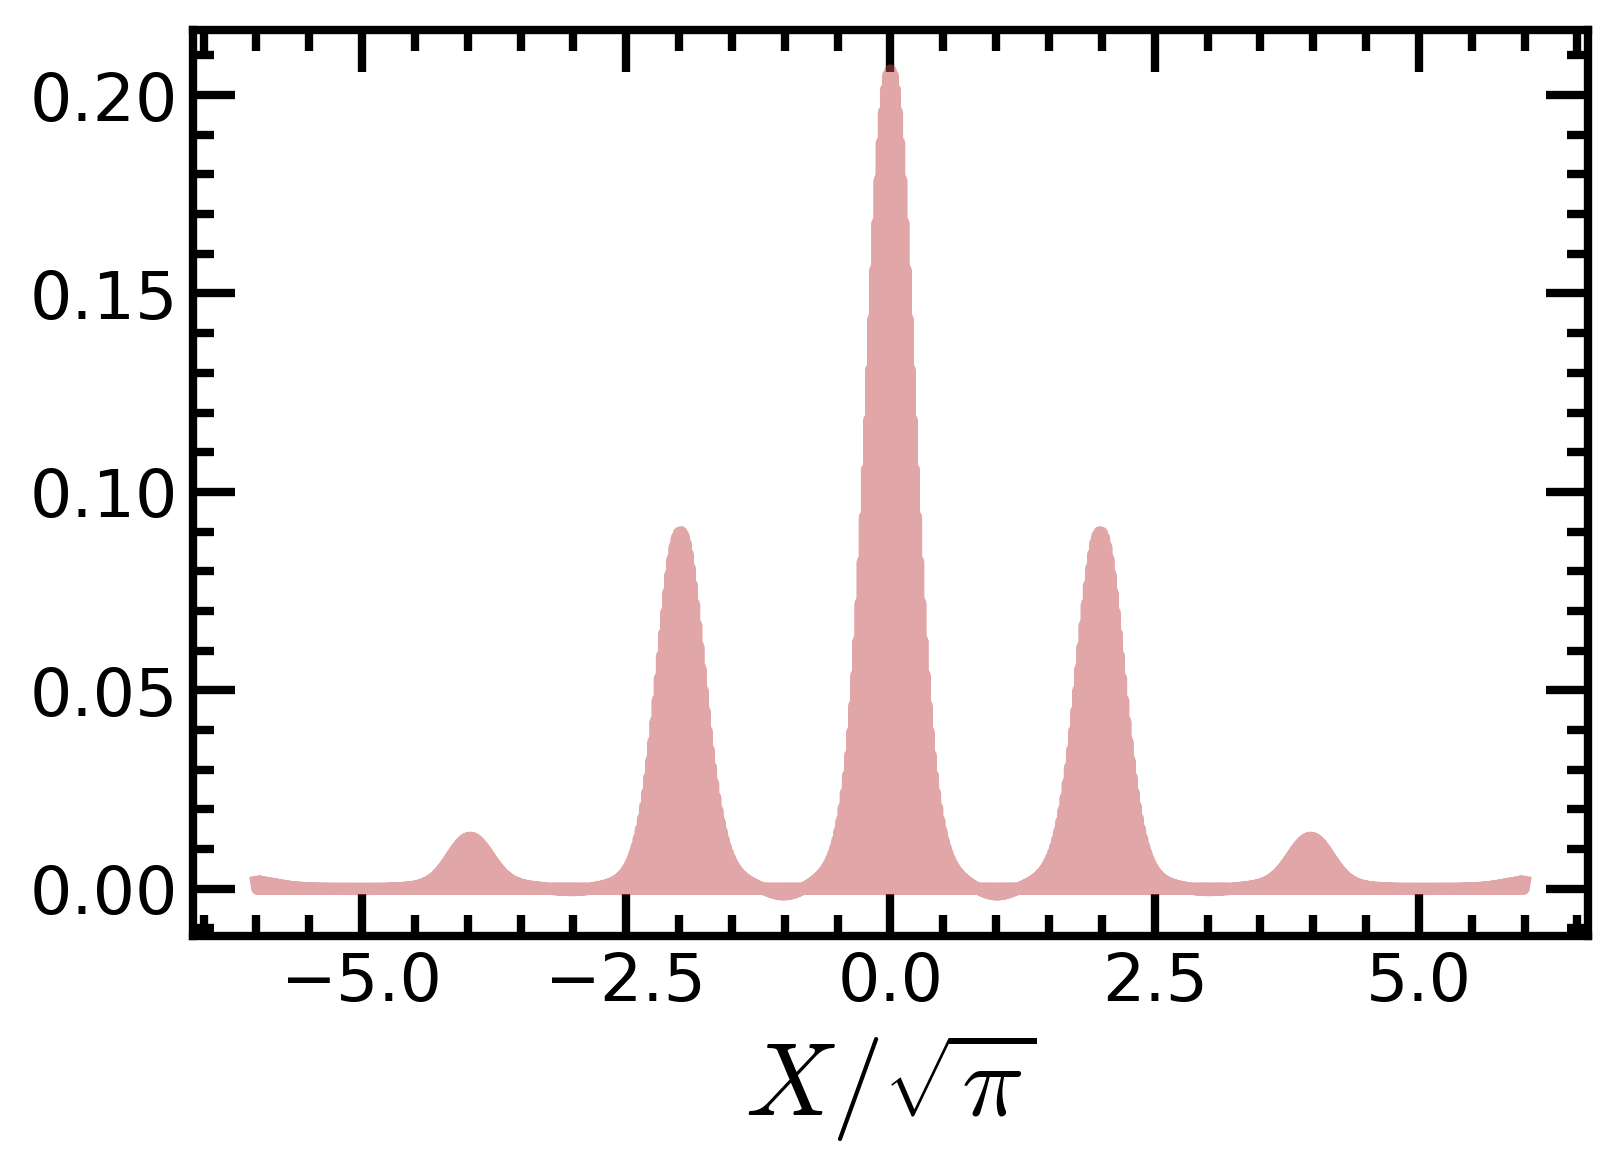

In [382]:
c = np.cos(np.pi/8)
s = np.sin(np.pi/8)
state1 = states[0]*s + states[2]*c
state0 = states[0]*c - states[2]*s
plt.plot(xpts/np.sqrt(np.pi), np.real(state0), color = 'C2', alpha = 0.5)
plt.xlabel(r'$X/\sqrt{\pi}$')

Text(0.5, 0, '$X/\\sqrt{\\pi}$')

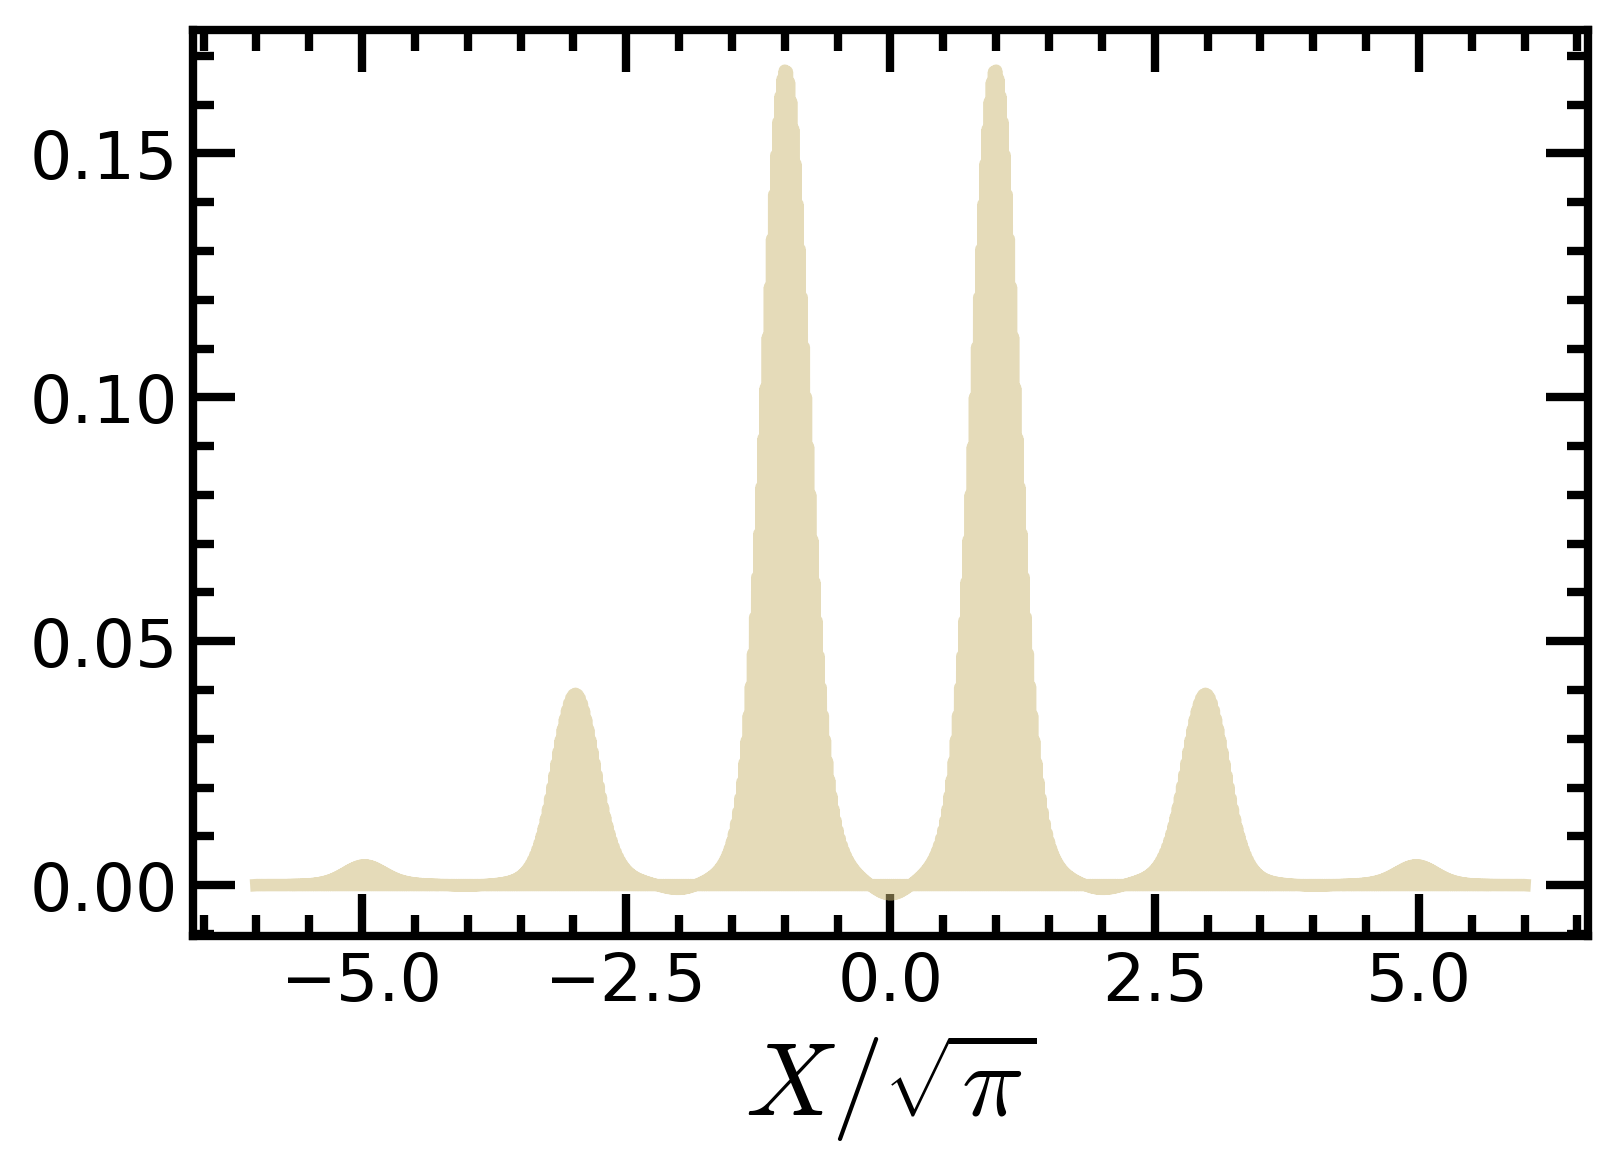

In [383]:
plt.plot(xpts/np.sqrt(np.pi), np.real(state1), color = 'C4', alpha = 0.5)
plt.xlabel(r'$X/\sqrt{\pi}$')

In [361]:
x = op_x.matrix_element(states[0],states[2])
print(x)

(-1.1779153227895606e-13+0j)


In [358]:
x = op_x.matrix_element(state0,state1)
print(x)

(-8.847992876361726e-15+0j)


Now, go to the regime where $V\gg\omega$, so the non-cos terms vanish

In [399]:
w = 0.000
Vx = 1
Vp = 1
energies, states = LLL_hamiltonian(w,Vx,Vp).eigenstates()

Text(0.5, 0, '$X/\\sqrt{\\pi}$')

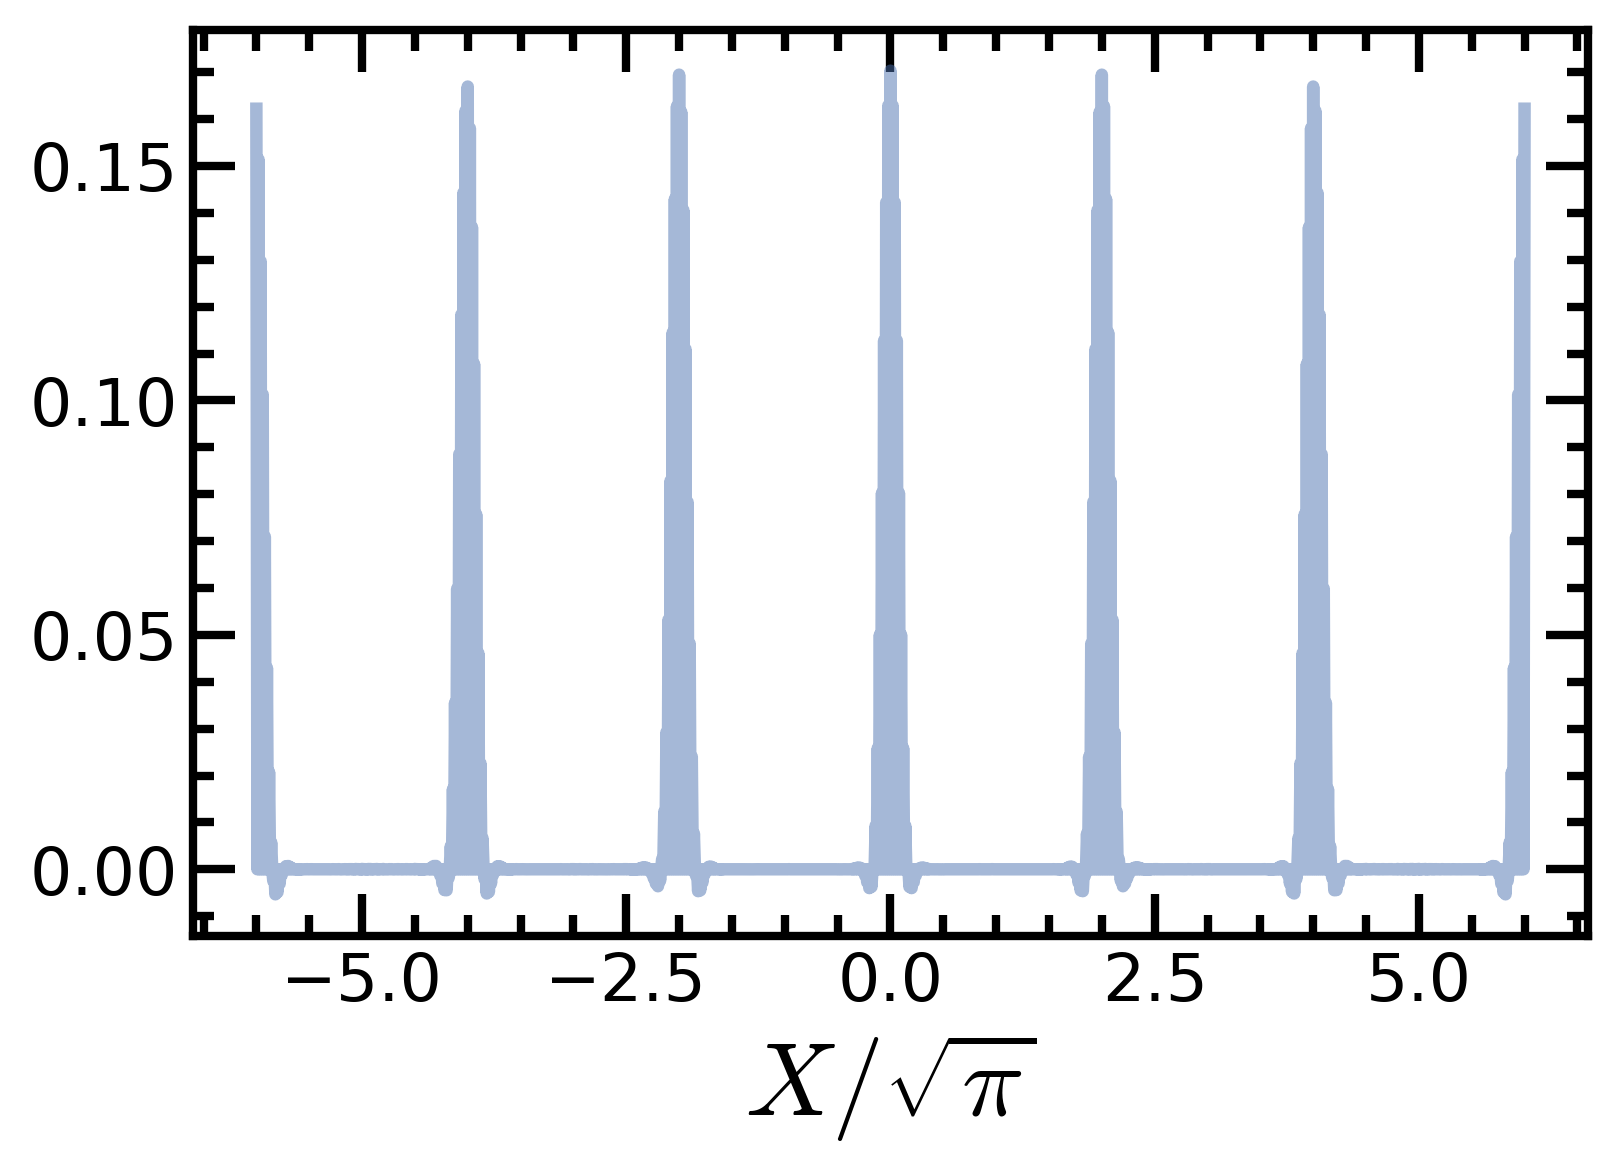

In [405]:
plt.plot(xpts/np.sqrt(np.pi), np.real(states[0]), alpha = 0.5)
plt.xlabel(r'$X/\sqrt{\pi}$')

Text(0.5, 0, '$X/\\sqrt{\\pi}$')

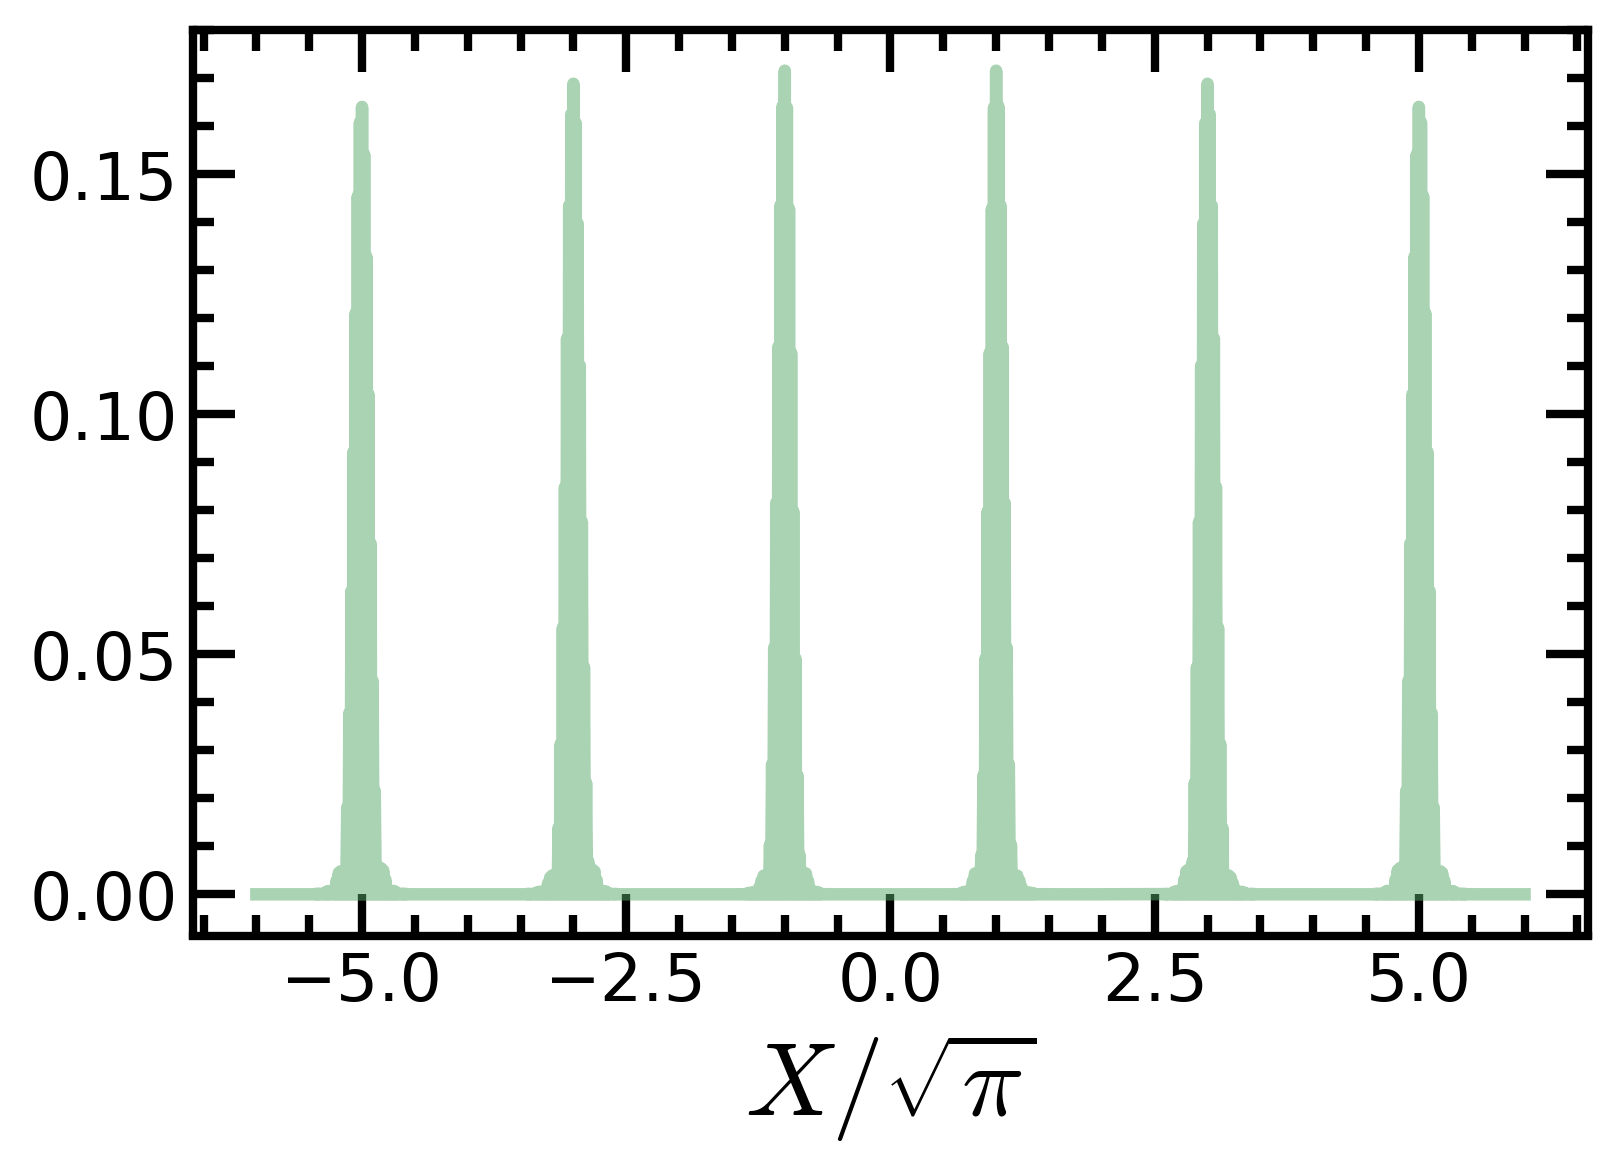

In [401]:
plt.plot(xpts/np.sqrt(np.pi), np.abs(states[1]), alpha = 0.5,color = 'C1')
plt.xlabel(r'$X/\sqrt{\pi}$')